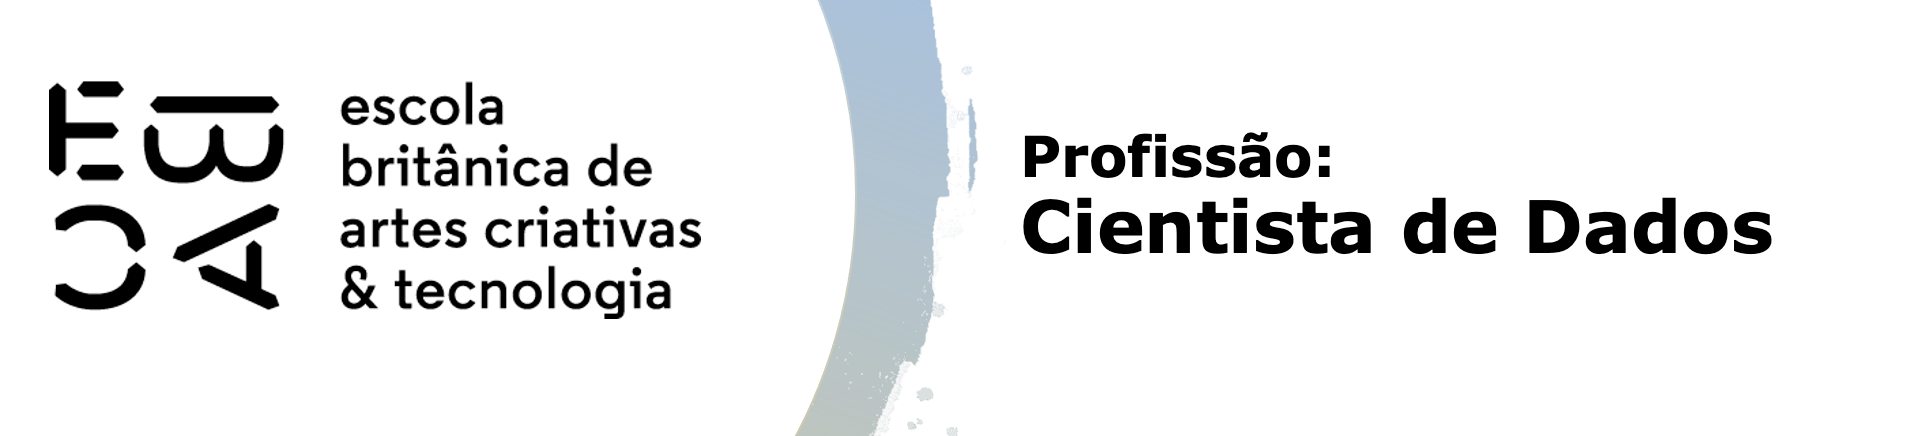

# Probabilidade - Tarefa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns

import matplotlib.ticker as mtick
from scipy.stats import norm
from scipy import stats

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

A probabilidade para valores entre 15,20 e inf é de 26,35%


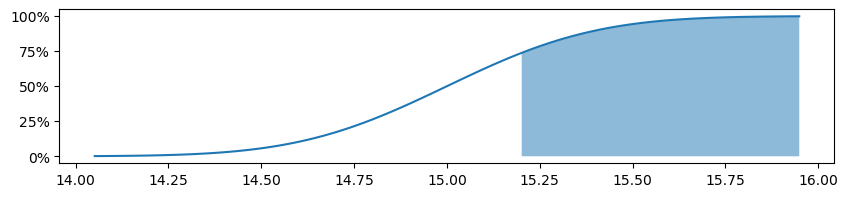

In [7]:
fig, ax = plt.subplots(figsize=(10,2))

mu = 15
variance = 0.1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.cdf(x, mu, sigma)
ax.plot(x, y)

std_lim = 0 # 95% CI
low = 15.2
high = +np.inf

plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

A probabilidade para valores entre -inf e 15,52 é de 95,00%


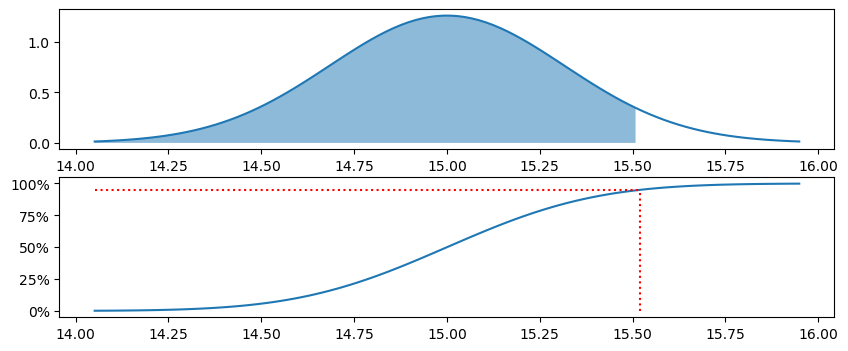

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(10,4))

mu = 15
variance = 0.1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
cdf = stats.norm.cdf(x, mu, sigma)
ax[1].plot(x, cdf)

low = -np.inf
high = 15.52


ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax[1].vlines(x=[high], 
             ymin=0, ymax=stats.norm.cdf(high, mu, sigma), 
             colors='r', linestyles='dotted')
ax[1].hlines(y=stats.norm.cdf(high, mu, sigma), 
             xmin=mu - 3*sigma, xmax=high, 
             colors='r', linestyles='dotted')

prob_area = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

y = stats.norm.pdf(x, mu, sigma)
ax[0].plot(x, y)
ax[0].fill_between(x, y, where=(low < x) & (x < high), alpha=.5)
# plt.text(low, 0, low, ha='center')
# plt.text(high, 0, high, ha='center')

3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [14]:
Y=np.linspace(-6, 6, 200)
Y
# Seu código começa aqui


array([-6.        , -5.93969849, -5.87939698, -5.81909548, -5.75879397,
       -5.69849246, -5.63819095, -5.57788945, -5.51758794, -5.45728643,
       -5.39698492, -5.33668342, -5.27638191, -5.2160804 , -5.15577889,
       -5.09547739, -5.03517588, -4.97487437, -4.91457286, -4.85427136,
       -4.79396985, -4.73366834, -4.67336683, -4.61306533, -4.55276382,
       -4.49246231, -4.4321608 , -4.3718593 , -4.31155779, -4.25125628,
       -4.19095477, -4.13065327, -4.07035176, -4.01005025, -3.94974874,
       -3.88944724, -3.82914573, -3.76884422, -3.70854271, -3.64824121,
       -3.5879397 , -3.52763819, -3.46733668, -3.40703518, -3.34673367,
       -3.28643216, -3.22613065, -3.16582915, -3.10552764, -3.04522613,
       -2.98492462, -2.92462312, -2.86432161, -2.8040201 , -2.74371859,
       -2.68341709, -2.62311558, -2.56281407, -2.50251256, -2.44221106,
       -2.38190955, -2.32160804, -2.26130653, -2.20100503, -2.14070352,
       -2.08040201, -2.0201005 , -1.95979899, -1.89949749, -1.83

In [11]:
high = 6
low = -6
mu = 0
sigma = 1
prob_area_norm = norm.cdf(high, mu, sigma) - norm.cdf(low, mu, sigma)
prob_area_norm

0.9999999980268246

In [12]:
high = 6
low = -6
mu = 0
sigma = 1
gl = 5
prob_area_std = stats.t.cdf(high, gl)*sigma - stats.t.cdf(low, gl)*sigma
prob_area_std

0.998153861710406

4. Faça uma visualização gráfica dos dados do item anterior.

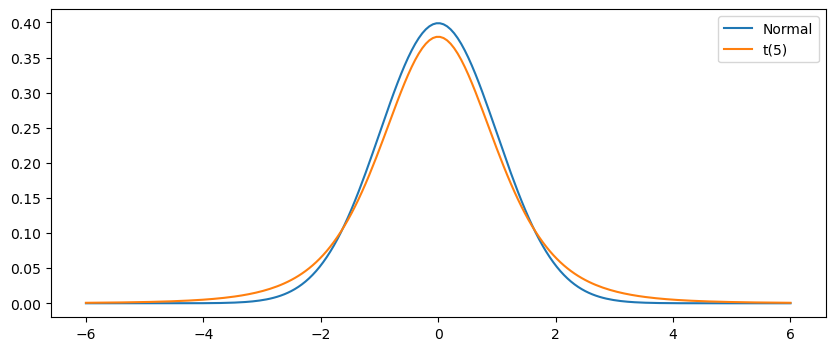

In [28]:
fig, ax = plt.subplots(figsize=(10,4))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 200)
y = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y, label='Normal')

for gl in ([5]):
    t = stats.t.pdf(x, gl)
    ax.plot(x, t, label=f't({gl})');


ax.legend()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [42]:
Y=np.linspace(0, 1, 20)
Y
# Seu código começa aqui


array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [43]:
mu = 0
sigma = 1
stats.norm.ppf(Y, mu, sigma)

array([       -inf, -1.61985626, -1.25211952, -1.00314797, -0.80459638,
       -0.63364   , -0.47950565, -0.33603814, -0.19920132, -0.06601181,
        0.06601181,  0.19920132,  0.33603814,  0.47950565,  0.63364   ,
        0.80459638,  1.00314797,  1.25211952,  1.61985626,         inf])

In [44]:
gl=5
stats.t.ppf(Y, gl)

array([       -inf, -1.97489346, -1.4358593 , -1.11439619, -0.87612441,
       -0.68067217, -0.51027663, -0.35532778, -0.20979907, -0.06939058,
        0.06939058,  0.20979907,  0.35532778,  0.51027663,  0.68067217,
        0.87612441,  1.11439619,  1.4358593 ,  1.97489346,         inf])

6. Faça um gráfico com os dados do item anterior.

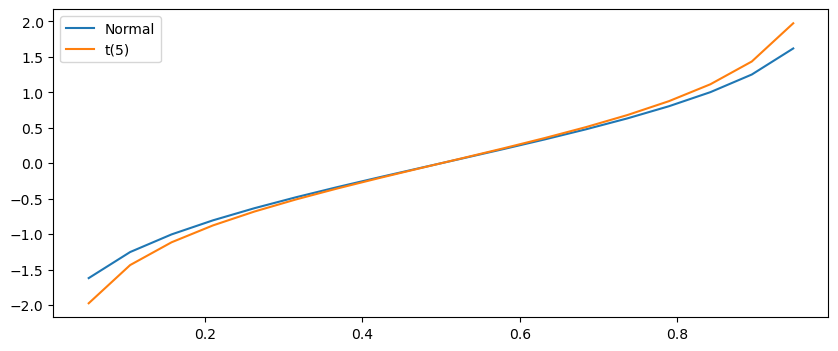

In [45]:
fig, ax = plt.subplots(figsize=(10,4))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 0*sigma, mu + 1*sigma, 20)
y = stats.norm.ppf(Y, mu, sigma)
ax.plot(x, y, label='Normal')

for gl in ([5]):
    t = stats.t.ppf(Y, gl)
    ax.plot(x, t, label=f't({gl})');


ax.legend()